# STXS 1.2 Scale Variations Uncertainties

See [the notebook about STXS 1.2](https://github.com/bonanomi/STXS_Unc/blob/master/ScaleVar_STXS1p2.ipynb) for more details. Here we use a `NanoAOD` HZZ4L sample to calculate $\mu_R$ and $\mu_F$ scale variations of the yields in each STXS 1.1 bin. The final uncertainty assigned corresponds to the maxiumum relative variation w.r.t. the nominal yield in each bin.

The advantage of using `NanoAOD` samples is their flexibility and the fact that they come directly with Rivet classification implemented. For STXS 1.2 we didn't have at disposal any ZZ4L `NanoAOD` sample, hence a ggH ntuple from the HZZ4L analysis group was used.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import pandas as pd
import uproot

In [2]:
## Not needed on lxplus
import os
os.system('/opt/exp_soft/cms/t3/eos-login -init -username mbonanom')

0

In [3]:
url = 'https://gist.githubusercontent.com/bonanomi/d14780f7562cb2a22fdd753a9d4459d4/raw/b3c6d77505b90eb38a886c19a31725df8ceb908f/MyMPLStyle'
plt.style.use(url)

In [4]:
tree = 'Events'
fname = '/eos/user/m/mbonanom/nanoAOD_GluGluHToZZTo4L_powheg2NNLOPS_M125.root'
branches = ['HTXS_stage1_2_cat_pTjet30GeV', 'LHEScaleWeight']

In [5]:
evt = uproot.open(fname)[tree]
evts = evt.arrays(branches)

In [6]:
binning = np.linspace(0, 500, 500)

In [7]:
h_stxs = np.histogram(evts[b'HTXS_stage1_2_cat_pTjet30GeV'], binning)

In [8]:
d = {}
for i in range(9):
    d[i] = [j[i] for j in evts[b'LHEScaleWeight']]

In [9]:
%%time
d_scales = {}
for i in range(9):
    d_scales[i] = np.histogram(evts[b'HTXS_stage1_2_cat_pTjet30GeV'], binning, weights=d[i])

CPU times: user 684 ms, sys: 50.5 ms, total: 735 ms
Wall time: 733 ms


In [10]:
int_nominal = [i for i in h_stxs[0] if i!=0]

In [11]:
%%time
int_scale = {}
for i in range(9):
    if (i==2) | (i==6):
        continue
    int_scale[i] = [j for j, k in zip(d_scales[i][0], h_stxs[0]) if k != 0]

CPU times: user 2.46 ms, sys: 0 ns, total: 2.46 ms
Wall time: 2.46 ms


In [12]:
bins_c =  0.5*(h_stxs[1][1:]+h_stxs[1][:-1])

In [13]:
stxs_bins = [round(j, 0) for i, j in zip(h_stxs[0], bins_c) if i!=0]

In [14]:
for stxs, nom_int in zip(enumerate(stxs_bins), int_nominal):
    k = stxs[0]; stxs_bin = stxs[1]
    print('[{}] => {} :::'.format(int(stxs_bin), nom_int), end='')
    for i in range(9):
        if (i==2) | (i==6):
            continue
        print(' {0:.2f}, '.format(int_scale[i][k]), end='')
    print('\n')

[100] => 50643 ::: 86460.02,  86199.33,  50279.04,  50643.00,  50244.25,  40326.19,  40156.08, 

[101] => 6945 ::: 8641.23,  8458.84,  7155.85,  6945.00,  6770.81,  5759.45,  5578.52, 

[102] => 1706 ::: 2100.80,  2045.54,  1774.50,  1706.00,  1648.59,  1425.75,  1366.12, 

[103] => 247 ::: 298.84,  291.20,  258.26,  247.00,  237.27,  208.90,  198.41, 

[104] => 31 ::: 37.43,  36.34,  32.69,  31.00,  29.48,  26.36,  24.74, 

[105] => 67231 ::: 118155.49,  139054.38,  55387.01,  67231.00,  74399.33,  52310.32,  58811.20, 

[106] => 200757 ::: 292391.88,  299904.19,  188899.20,  200757.00,  208916.97,  166216.28,  174309.62, 

[107] => 66458 ::: 86479.88,  87627.44,  64561.94,  66458.00,  67897.75,  56622.25,  57937.41, 

[108] => 52621 ::: 66629.19,  67027.69,  52206.34,  52621.00,  52941.81,  44140.16,  44333.53, 

[109] => 10493 ::: 13494.50,  13359.56,  10638.84,  10493.00,  10371.06,  8600.94,  8468.03, 

[110] => 14219 ::: 18559.75,  18789.38,  13893.56,  14219.00,  14463.25,  1202

In [15]:
for stxs, nom_int in zip(enumerate(stxs_bins), int_nominal):
    k = stxs[0]; stxs_bin = stxs[1]
    print('[{}] => {} :::'.format(int(stxs_bin), nom_int), end='')
    for i in range(9):
        if (i==2) | (i==6):
            continue
        norm_stxs = (int_scale[i][k] - nom_int)/nom_int * 1e2
        print(' {0:.2f}%, '.format(norm_stxs), end='')
    print('\n')

[100] => 50643 ::: 70.72%,  70.21%,  -0.72%,  0.00%,  -0.79%,  -20.37%,  -20.71%, 

[101] => 6945 ::: 24.42%,  21.80%,  3.04%,  0.00%,  -2.51%,  -17.07%,  -19.68%, 

[102] => 1706 ::: 23.14%,  19.90%,  4.02%,  0.00%,  -3.37%,  -16.43%,  -19.92%, 

[103] => 247 ::: 20.99%,  17.89%,  4.56%,  0.00%,  -3.94%,  -15.43%,  -19.67%, 

[104] => 31 ::: 20.74%,  17.24%,  5.46%,  0.00%,  -4.90%,  -14.96%,  -20.20%, 

[105] => 67231 ::: 75.75%,  106.83%,  -17.62%,  0.00%,  10.66%,  -22.19%,  -12.52%, 

[106] => 200757 ::: 45.64%,  49.39%,  -5.91%,  0.00%,  4.06%,  -17.21%,  -13.17%, 

[107] => 66458 ::: 30.13%,  31.85%,  -2.85%,  0.00%,  2.17%,  -14.80%,  -12.82%, 

[108] => 52621 ::: 26.62%,  27.38%,  -0.79%,  0.00%,  0.61%,  -16.12%,  -15.75%, 

[109] => 10493 ::: 28.60%,  27.32%,  1.39%,  0.00%,  -1.16%,  -18.03%,  -19.30%, 

[110] => 14219 ::: 30.53%,  32.14%,  -2.29%,  0.00%,  1.72%,  -15.44%,  -13.92%, 

[111] => 23014 ::: 26.80%,  27.11%,  -0.11%,  0.00%,  0.06%,  -16.78%,  -16.94%, 

[112] 

In [16]:
for stxs, nom_int in zip(enumerate(stxs_bins), int_nominal):
    k = stxs[0]; stxs_bin = stxs[1]
    print('[{}] => :::'.format(int(stxs_bin)), end='')
    for i in range(9):
        if (i==2) | (i==6):
            continue
        norm_stxs = nom_int/(int_scale[i][k])
        print(' {0:.4f}, '.format(norm_stxs), end='')
    print('\n')

[100] => ::: 0.5857,  0.5875,  1.0072,  1.0000,  1.0079,  1.2558,  1.2612, 

[101] => ::: 0.8037,  0.8210,  0.9705,  1.0000,  1.0257,  1.2058,  1.2450, 

[102] => ::: 0.8121,  0.8340,  0.9614,  1.0000,  1.0348,  1.1966,  1.2488, 

[103] => ::: 0.8265,  0.8482,  0.9564,  1.0000,  1.0410,  1.1824,  1.2449, 

[104] => ::: 0.8282,  0.8530,  0.9483,  1.0000,  1.0515,  1.1759,  1.2531, 

[105] => ::: 0.5690,  0.4835,  1.2138,  1.0000,  0.9037,  1.2852,  1.1432, 

[106] => ::: 0.6866,  0.6694,  1.0628,  1.0000,  0.9609,  1.2078,  1.1517, 

[107] => ::: 0.7685,  0.7584,  1.0294,  1.0000,  0.9788,  1.1737,  1.1471, 

[108] => ::: 0.7898,  0.7851,  1.0079,  1.0000,  0.9939,  1.1921,  1.1869, 

[109] => ::: 0.7776,  0.7854,  0.9863,  1.0000,  1.0118,  1.2200,  1.2391, 

[110] => ::: 0.7661,  0.7568,  1.0234,  1.0000,  0.9831,  1.1825,  1.1617, 

[111] => ::: 0.7886,  0.7867,  1.0011,  1.0000,  0.9994,  1.2016,  1.2040, 

[112] => ::: 0.7829,  0.7923,  0.9833,  1.0000,  1.0144,  1.2181,  1.2411, 


In [17]:
integrals = {i: {int(k): [] for k in stxs_bins} for i in range(9) if ((i!= 2) & (i!= 6))}
for stxs, nom_int in zip(enumerate(stxs_bins), int_nominal):
    k = stxs[0]; stxs_bin = int(stxs[1])
    for i in range(9):
        if (i==2) | (i==6):
            continue
        int_varied = int_scale[i][k]
        integrals[i][stxs_bin] = (int_varied)

In [18]:
# for i in range(9):
#     if (i==2) | (i==6):
#         continue

#     integrals[i][104] += integrals[i][105]
#     integrals[i][104] += integrals[i][106]
#     integrals[i][104] += integrals[i][107]
    
#     integrals[i][108] += integrals[i][109]
#     integrals[i][108] += integrals[i][110]
#     integrals[i][108] += integrals[i][111]
#     integrals[i][108] += integrals[i][101]
#     integrals[i][108] += integrals[i][102]

In [19]:
yields = open("Yields_1p2.txt","w+")
yields.write('STXS\t\t DD \t\t DN \t\t ND \t\t NN \t\t NU \t\t UN \t\t UU')
yields.write('\n')

for stxs, nom_int in zip(enumerate(stxs_bins), int_nominal):
    k = stxs[0]; stxs_bin = int(stxs[1])
    yields.write('{} \t'.format(int(stxs_bin)))
    for i in range(9):
        if (i==2) | (i==6):
            continue
        yields.write('\t{0:.2f},\t ' .format(integrals[i][stxs_bin]))
    yields.write('\n')
yields.close()

In [20]:
normalization = open("Normalization_1p2.txt","w+")
normalization.write('STXS\t\t DD \t\t DN \t\t ND \t\t NN \t\t NU \t\t UN \t\t UU')
normalization.write('\n')
for stxs, nom_int in zip(enumerate(stxs_bins), int_nominal):
    k = stxs[0]; stxs_bin = int(stxs[1])
    normalization.write('{} \t'.format(int(stxs_bin)))
    for i in range(9):
        if (i==2) | (i==6):
            continue
        norm_int = nom_int/integrals[i][stxs_bin]
        normalization.write('\t{0:.2f},\t ' .format(norm_int))
    normalization.write('\n')
normalization.close()

In [21]:
histos = {}
for i in range(9):
    if (i==2) | (i==6):
        continue    
    values = []
    for stxs, nom_int in zip(enumerate(stxs_bins), int_nominal):
        k = stxs[0]; stxs_bin = int(stxs[1])
        norm_int = nom_int/integrals[i][stxs_bin]
        values.append(norm_int)
    histos[i] = values

In [22]:
scale_var = {
    0: r'$\mu_r$ = 0.5, $\mu_f$ = 0.5',
    1: r'$\mu_r$ = 0.5, $\mu_f$ = 1.0',
    3: r'$\mu_r$ = 1.0, $\mu_f$ = 0.5',
    4: r'$\mu_r$ = 1.0, $\mu_f$ = 1.0',
    5: r'$\mu_r$ = 1.0, $\mu_f$ = 2.0',
    7: r'$\mu_r$ = 2.0, $\mu_f$ = 1.0',
    8: r'$\mu_r$ = 2.0, $\mu_f$ = 2.0'
}

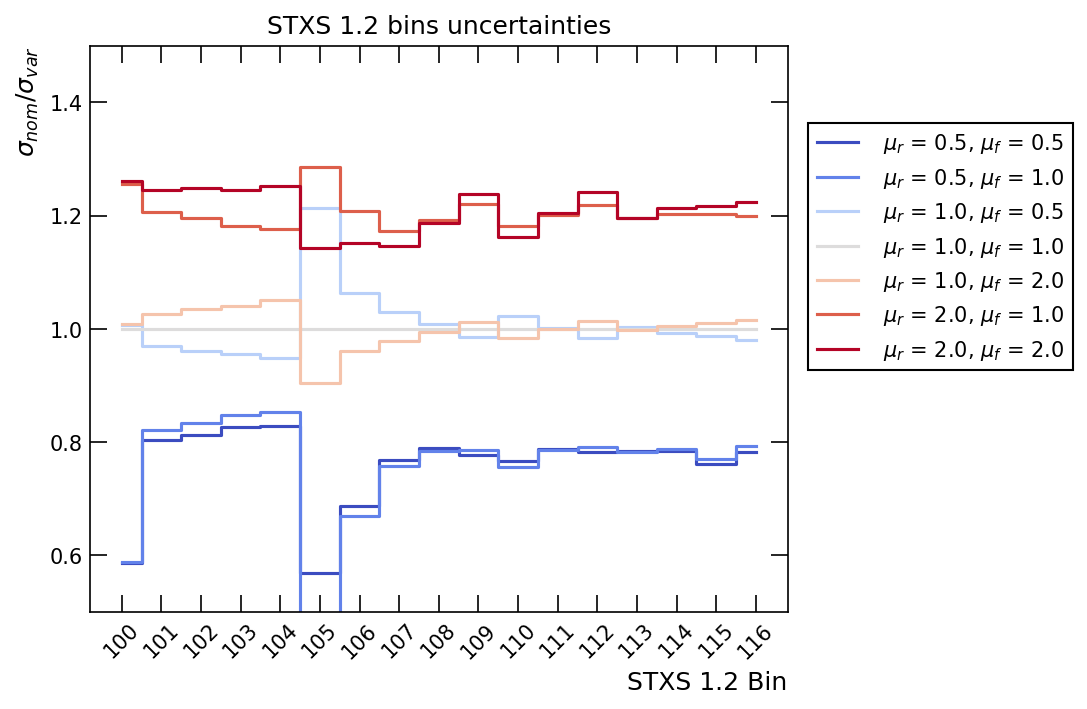

In [25]:
plt.figure(figsize = (6,5))
cmap = plt.cm.coolwarm(np.linspace(0, 1., 9.))
for i in range(9):
    if (i==2) | (i==6):
        continue
    plt.step(stxs_bins, histos[i], where = 'mid', label = scale_var[i], color = cmap[i], linewidth = 1.5)
    plt.grid(b = None)
plt.legend(bbox_to_anchor=(1., 0.9))
plt.xticks(stxs_bins, rotation = 45)
plt.tick_params(which='minor', length=0)
plt.ylim(0.5, 1.5)
plt.title('STXS 1.2 bins uncertainties')
plt.xlabel('STXS 1.2 Bin', ha='right', x=1.0, fontsize = 12)
plt.ylabel(r'$\sigma_{nom}/\sigma_{var}$', ha='right', y=1.0, fontsize = 12)
# plt.savefig('STXS1p2_Unc.pdf', bbox_inches='tight')